In [ ]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB ? eta 0:00:000:00:0100:01
ERROR: Could not install packages due to an OSError: [Errno 122] Disk quota exceeded


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: /local/environments/default/default-venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import time
import pickle
import datetime


rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
def import_one_series(usage_file, usage_column, weather_file, weather_columns):
  usage_df = pd.read_csv(usage_file)
  usage_df = usage_df[[usage_column]]
  usage_df = usage_df.rename(columns={usage_column: "y"})
  #usage_df["y"] = (usage_df["y"] - usage_df.mean()["y"])/usage_df.std()["y"]
  usage_df["unique_id"] = usage_column
  usage_df["ds"] = [pd.Timestamp(701280+x, unit="h") for x in usage_df.index]
    
  usage_df["day_of_week_sin"] = [np.sin((2*np.pi*x.day_of_week)/6) for x in usage_df["ds"]]
  usage_df["day_of_week_cos"] = [np.cos((2*np.pi*x.day_of_week)/6) for x in usage_df["ds"]]
    
  usage_df["month_sin"] = [np.sin((2*np.pi*x.month)/12) for x in usage_df["ds"]]
  usage_df["month_cos"] = [np.cos((2*np.pi*x.month)/12) for x in usage_df["ds"]]
    
  usage_df["hour_sin"] = [np.sin((2*np.pi*x.hour)/24) for x in usage_df["ds"]]
  usage_df["hour_cos"] = [np.cos((2*np.pi*x.hour)/24) for x in usage_df["ds"]]

  weather_df = pd.read_csv(weather_file)
  weather_df_select = weather_df[[i for i in weather_columns]]
  weather_df_norm = weather_df_select  
  #weather_df_norm = (weather_df_select - weather_df_select.mean())/weather_df_select.std()

  data_df = pd.concat([usage_df, weather_df_norm], axis=1)

  #print("Head:")
  #print(data_df.head())
  #print("Describe:")
  #print(data_df.describe())
  
  return(data_df)

def arrange_multiple_series(usage_file, usage_column, weather_file, weather_columns, training_data_fraction, training_data_series):
  print("Importing data {} and {}".format(usage_file, weather_file))
  all_df = 0
  training_df = 0
  for column in usage_column:
    temp = import_one_series(usage_file, column, weather_file, weather_columns)
    if type(all_df) == int:
      all_df = temp
    else:
      all_df = pd.concat([all_df, temp])
    if column in training_data_series:
      length = len(temp)
      cutoff = int(length*training_data_fraction)
      temp2 = temp[:cutoff]
      if type(training_df) == int:
        training_df = temp2
      else:
        training_df = pd.concat([training_df, temp2])
  print("Data has length {}. Using {} for training.".format(length, cutoff))
  return(all_df, training_df)

def save_data_to_pickle(all_df, training_df):
  all_df_name = "/data/wiay/2386142c/msci_project/condor_jobs/data/processed_data/{}ADF.pck".format(time.strftime("%Y-%m-%d-%H_%M_%S"))
  training_df_name = "/data/wiay/2386142c/msci_project/condor_jobs/data/processed_data/{}TDF.pck".format(time.strftime("%Y-%m-%d-%H_%M_%S"))
  with open(all_df_name, "wb") as f:
    pickle.dump(all_df, f)
  with open(training_df_name, "wb") as f:
    pickle.dump(training_df, f)

In [3]:
all_df, training_df = arrange_multiple_series("2050HighMedium.csv", 
                                              ["Scotland.1"], 
                                              "Glasgow_2050Medium10_.csv", 
                                              ["7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24"], 
                                              0.25, 
                                              ["Scotland.1"])

Importing data 2050HighMedium.csv and Glasgow_2050Medium10_.csv
Data has length 8760. Using 2190 for training.


In [ ]:
all_df.head()

y   unique_id                  ds  day_of_week_sin  day_of_week_cos  \
0  0.056724  Scotland.1 2050-01-01 00:00:00        -0.866025              0.5   
1  0.123770  Scotland.1 2050-01-01 01:00:00        -0.866025              0.5   
2  0.125896  Scotland.1 2050-01-01 02:00:00        -0.866025              0.5   
3  0.120982  Scotland.1 2050-01-01 03:00:00        -0.866025              0.5   
4  0.178596  Scotland.1 2050-01-01 04:00:00        -0.866025              0.5   

   month_sin  month_cos  hour_sin  hour_cos         7  ...        15  \
0        0.5   0.866025  0.000000  1.000000 -0.807700  ... -0.478373   
1        0.5   0.866025  0.258819  0.965926 -0.732725  ... -0.478373   
2        0.5   0.866025  0.500000  0.866025 -0.676493  ... -0.478373   
3        0.5   0.866025  0.707107  0.707107 -0.601518  ... -0.478373   
4        0.5   0.866025  0.866025  0.500000 -0.545287  ... -0.478373   

         16        17        18        19        20        21        22  \
0 -0.692559 -0.634649 -0.467586 -0.703039 -0.637099 -0.375248  1.104386   
1 -0.692559 -0.634649 -0.467586 -0.703039 -0.637099 -0.271647  1.174929   
2 -0.692559 -0.634649 -0.467586 -0.703039 -0.637099 -0.168045  1.245471   
3 -0.692559 -0.634649 -0.467586 -0.703039 -0.637099 -0.064443  1.280743   
4 -0.692559 -0.634649 -0.467586 -0.703039 -0.637099  0.039158  1.351285   

         23       24  
0 -0.395450 -0.34511  
1 -0.395450 -0.34511  
2 -0.702908 -0.34511  
3 -0.702908 -0.34511  
4 -0.702908 -0.34511  

[5 rows x 27 columns]

In [4]:

mean_daily_temp = []
for i in range(365):
    day = all_df[i*24:(i+1)*24]
    mean = day["y"].sum()/24
    mean_daily_temp += [mean]
    
mda = []
for x in mean_daily_temp:
    mda += [x]*24
    
mda_df = pd.DataFrame(mda, columns=["0"])
all_df = pd.concat([all_df, mda_df], axis=1)

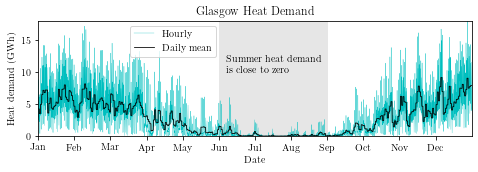

In [7]:
#all_df["ds"] = all_df["ds"].dt.strftime('%m-%d %H:%M:%S')
#all_df["ds"] = all_df["ds"].apply(lambda x: x.dt.strftime('%m-%d %H:%M:%S'))

x_1 = all_df.iloc[4056]["ds"]
x_2 = all_df.iloc[6120]["ds"]
x = all_df.iloc[3800]["ds"]
x_3 = 5256/8760
x_4 = 5688/8760
x_5 = 6120/8760
x_6 = 7440/8760

x_7 = 2000/8760
x_8 = 8540/8760
x_9 = 1780/8760

x_10 = all_df.iloc[3650]["ds"]
x_11 = all_df.iloc[5840]["ds"]

plt.figure(figsize=(6.75,2.5))
plt.ylim([0, 18])
plt.xlabel("Date")
plt.ylabel("Heat demand (GWh)")
plt.xlim([all_df.iloc[0]["ds"], all_df.iloc[-1]["ds"]])
plt.plot(all_df["ds"],all_df["y"], c="c", label="Hourly", lw=0.3)
plt.plot(all_df["ds"],all_df["0"], c="k", label="Daily mean", lw=0.8)
#plt.axvline(x=x_1, c="k")
#plt.axvline(x=x_2, c="k")

plt.fill_between([x_10, x_11], 18, 0, color=[(0.9,0.9,0.9,1)])
#plt.axhline(y=-1, xmin=0, xmax=x_3, linewidth=10, c="r")
#plt.axhline(y=-1, xmin=x_3, xmax=x_4, linewidth=10, c="g")
#plt.axhline(y=-1, xmin=x_4, xmax=x_6, linewidth=10, c="y")
#plt.axhline(y=-1, xmin=x_6, xmax=1, linewidth=10, c="g")

#plt.axhline(y=-1.2, xmin=0, xmax=x_9, linewidth=10, c="r")
#plt.axhline(y=-1.2, xmin=x_8, xmax=1, linewidth=10, c="g")
#plt.axhline(y=-1.2, xmin=x_9, xmax=x_7, linewidth=10, c="y")

tick1 = [pd.Timestamp(701280 + 730*x, unit="h") for x in range(12)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(tick1, months)

plt.title("Glasgow Heat Demand")
plt.legend(loc="upper left", bbox_to_anchor=(0.2,1))
plt.text(x, 10, "Summer heat demand \n is close to zero")
plt.tight_layout()
plt.savefig("overall_data.png", dpi=200)
plt.show()

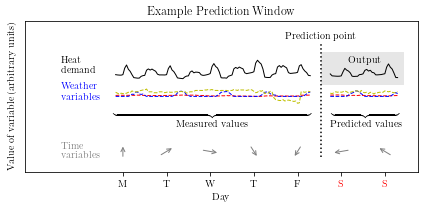

In [164]:
offset = 556

s_1 = 500 + offset
s_2 = 608 + offset
s_3 = 656 + offset
diff = 10

plt.figure(figsize=(6,3))

plt.plot(all_df["ds"][s_1:s_2],all_df["7"][s_1:s_2]/5, color="r", lw=1, ls="--")
plt.plot(all_df["ds"][s_1:s_2],all_df["16"][s_1:s_2]/20, c="b", lw=1, ls="--")
plt.plot(all_df["ds"][s_1:s_2],all_df["21"][s_1:s_2]/15-10, c="y", lw=1, ls="--")
plt.plot(all_df["ds"][s_1:s_2],all_df["y"][s_1:s_2]*2+25, c="k", lw=1)

plt.plot(all_df["ds"][s_2+diff:s_3],all_df["7"][s_2+diff:s_3]/5, color="r", lw=1, ls="--")
plt.plot(all_df["ds"][s_2+diff:s_3],all_df["16"][s_2+diff:s_3]/20, c="b", lw=1, ls="--")
plt.plot(all_df["ds"][s_2+diff:s_3],all_df["21"][s_2+diff:s_3]/15-10, c="y", lw=1, ls="--")
plt.plot(all_df["ds"][s_2+diff:s_3],all_df["y"][s_2+diff:s_3]*2+25, c="k", lw=1)

plt.fill_between([all_df.iloc[s_2+int(diff/2)]["ds"], all_df.iloc[s_3+2]["ds"]], 65, 18, color=[(0.9,0.9,0.9,1)])
plt.axvline(x=all_df.iloc[s_2+int(diff/2)]["ds"], ymin=0.1, ymax=0.85, c="k", ls=":")

tick1 = [pd.Timestamp(701784 + 24*x + offset, unit="h") for x in range(35)]
tick2 = ["M", "T", "W", "T", "F", "S", "S"] *5

plt.xticks(tick1, tick2)
plt.yticks([])
plt.xlim([all_df.iloc[s_1-50]["ds"], all_df.iloc[s_3+10]["ds"]])
plt.ylim([-110, 110])
plt.xlabel("Day")
plt.ylabel("Value of variable (arbitrary units)")
plt.title("Example Prediction Window")

for n in [5, 6, 12, 13, 19, 20, 26, 27, 33, 34]:
    plt.gca().get_xticklabels()[n].set_color("red")

plt.text(all_df.iloc[s_1-30]["ds"], 33, "  Heat\ndemand")
plt.text(all_df.iloc[s_1-30]["ds"], -5, "Weather\nvariables", c="b")
plt.text(all_df.iloc[s_1-30]["ds"], -90, "Time\nvariables", c="0.5")
plt.text(all_df.iloc[s_2-15]["ds"], 85, "Prediction point")
plt.text(all_df.iloc[s_2+20]["ds"], 50, "Output")
#plt.text(all_df.iloc[s_2+17]["ds"], 53, "Future demand")

plt.text(all_df.iloc[s_2-110]["ds"], -25, r"$\underbrace{\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad}$")
plt.text(all_df.iloc[s_2+10]["ds"], -25, r"$\underbrace{\quad\quad\quad\quad\quad\quad\quad}$")
plt.text(all_df.iloc[s_2-75]["ds"], -45, "Measured values")
plt.text(all_df.iloc[s_2+10]["ds"], -45, "Predicted values")

sin = [np.sin((2*np.pi*n)/7) for n in [0,1,2,3,4,5,6]]
cos = [np.cos((2*np.pi*n)/7) for n in [0,1,2,3,4,5,6]]
for x in range(len(sin)):
    tick = pd.Timestamp(701784 + 24*x + offset + 5*sin[x], unit="h")
    tick_ = pd.Timestamp(701784 + 24*x + offset - 5*sin[x], unit="h")
    plt.annotate("", xy=(tick, 10*cos[x]-80), xytext=(tick_, -80-10*cos[x]), arrowprops=dict(arrowstyle="->", color="0.5"))
    

plt.tight_layout()
plt.savefig("window_data.png", dpi=200)
plt.show()

In [129]:
all_df.iloc[s_1]["ds"]

Timestamp('2050-02-14 00:00:00')

552   2050-01-24
Name: ds, dtype: datetime64[ns]
[0.0, 0.7818314824680299, 0.9749279121818238, 0.4338837391175582, -0.433883739117558, -0.9749279121818237, -0.78183148246803]
[1.0, 0.6234898018587335, -0.22252093395631437, -0.900968867902419, -0.900968867902419, -0.22252093395631461, 0.6234898018587333]


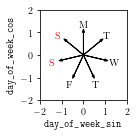

In [38]:
print(all_df["ds"][552:553])
#print(all_df["ds"][1320:1321])
#print(pd.Timestamp(701784, unit="h"))

plt.figure(figsize=(2,2))

days = ["M", "T", "W", "T", "F", "S", "S"]
sin = [np.sin((2*np.pi*n)/7) for n in [0,1,2,3,4,5,6]]
cos = [np.cos((2*np.pi*n)/7) for n in [0,1,2,3,4,5,6]]
print(sin)
print(cos)
for x in range(len(sin)):
    plt.arrow(0,0,sin[x],cos[x], head_width=0.1, color="k")
    if (x == 5) or (x == 6):
        color = "red"
    else:
        color = "black"
    plt.annotate(days[x], (sin[x]*1.4-0.2, cos[x]*1.4-0.15), fontsize=10, color=color)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel(r"\texttt{day\_of\_week\_sin}")
plt.ylabel(r"\texttt{day\_of\_week\_cos}")
plt.xticks([-2,-1,0,1,2])
plt.tight_layout()
plt.savefig("cyclic.png", dpi=200)
plt.show()

In [ ]:
all_df = all_df.drop(["0"], axis=1)

In [ ]:
alt_df = all_df[0:2000]
train_df = all_df[0:5256]
val_df = all_df[6120:7440]
overall_df = pd.concat([train_df, val_df], axis=0).reset_index()

In [ ]:
save_data_to_pickle(all_df, alt_df)

In [ ]:
its = 0
with open("/data/wiay/2386142c/msci_project/condor_jobs/wandb_bayes_sweep_individual_1/its", "wb") as f:
    pickle.dump(its, f)

In [ ]:
with open("/data/wiay/2386142c/msci_project/condor_jobs/wandb_bayes_sweep_individual_1/its{}".format(0), "rb") as f:
    its = pickle.load(f)